# Bivariate Boxplots 
**Use Case:** \
helps find correlation between two values by binning \
boxplots help in accounting for outliers 

**Code Logic:** \
First parameter is the df you want to visualize \
Second parameter is the amount of bins you want \
(categorical features will based on amount of categories)\
Third parameter is the feature you want to compare to \
Fourth parameter is the type of boxplots you want; `iqr` or `zscore`

**Actionable Next Steps:** \
Removing Outliers \
Flagging feature engineering

**Note:** \
Generating boxplots create warnings, this is probably due to pd.cut.

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_box(ax, df, x, y, xlabel, ylabel, title, color, title_position, order=None):
    sns.boxplot(data = df, y = y, x = x, order = order,
                linewidth = 1.2, color = color,
                flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9),
                ax=ax)

    ax.set_xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    ax.set_ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)

from scipy import stats

def plot_boxplots(dataframe, bins, x_col, method):
    num_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    all_cols = num_cols + cat_cols
    n = len(all_cols)
    ncols = 2
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2.5 * nrows))

    for ax, col in zip(axes.flatten(), all_cols):
        if col in num_cols:
            if method == 'iqr':
                Q1 = dataframe[col].quantile(0.25)
                Q3 = dataframe[col].quantile(0.75)
                IQR = Q3 - Q1
                dataframe = dataframe[~((dataframe[col] < (Q1 - 1.5 * IQR)) |(dataframe[col] > (Q3 + 1.5 * IQR)))]
            elif method == 'zscore':
                dataframe = dataframe[(np.abs(stats.zscore(dataframe[col])) < 3)]
            dataframe['binned'] = pd.cut(dataframe[col], bins=bins)
        else:
            dataframe['binned'] = pd.Categorical(dataframe[col])
        plot_box(ax, dataframe, x = x_col, y = "binned", xlabel = x_col, ylabel = "Bins", title = col, color = "mediumseagreen", title_position = 0.2)
        dataframe = dataframe.drop(columns=['binned'])

    # Remove any unused subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

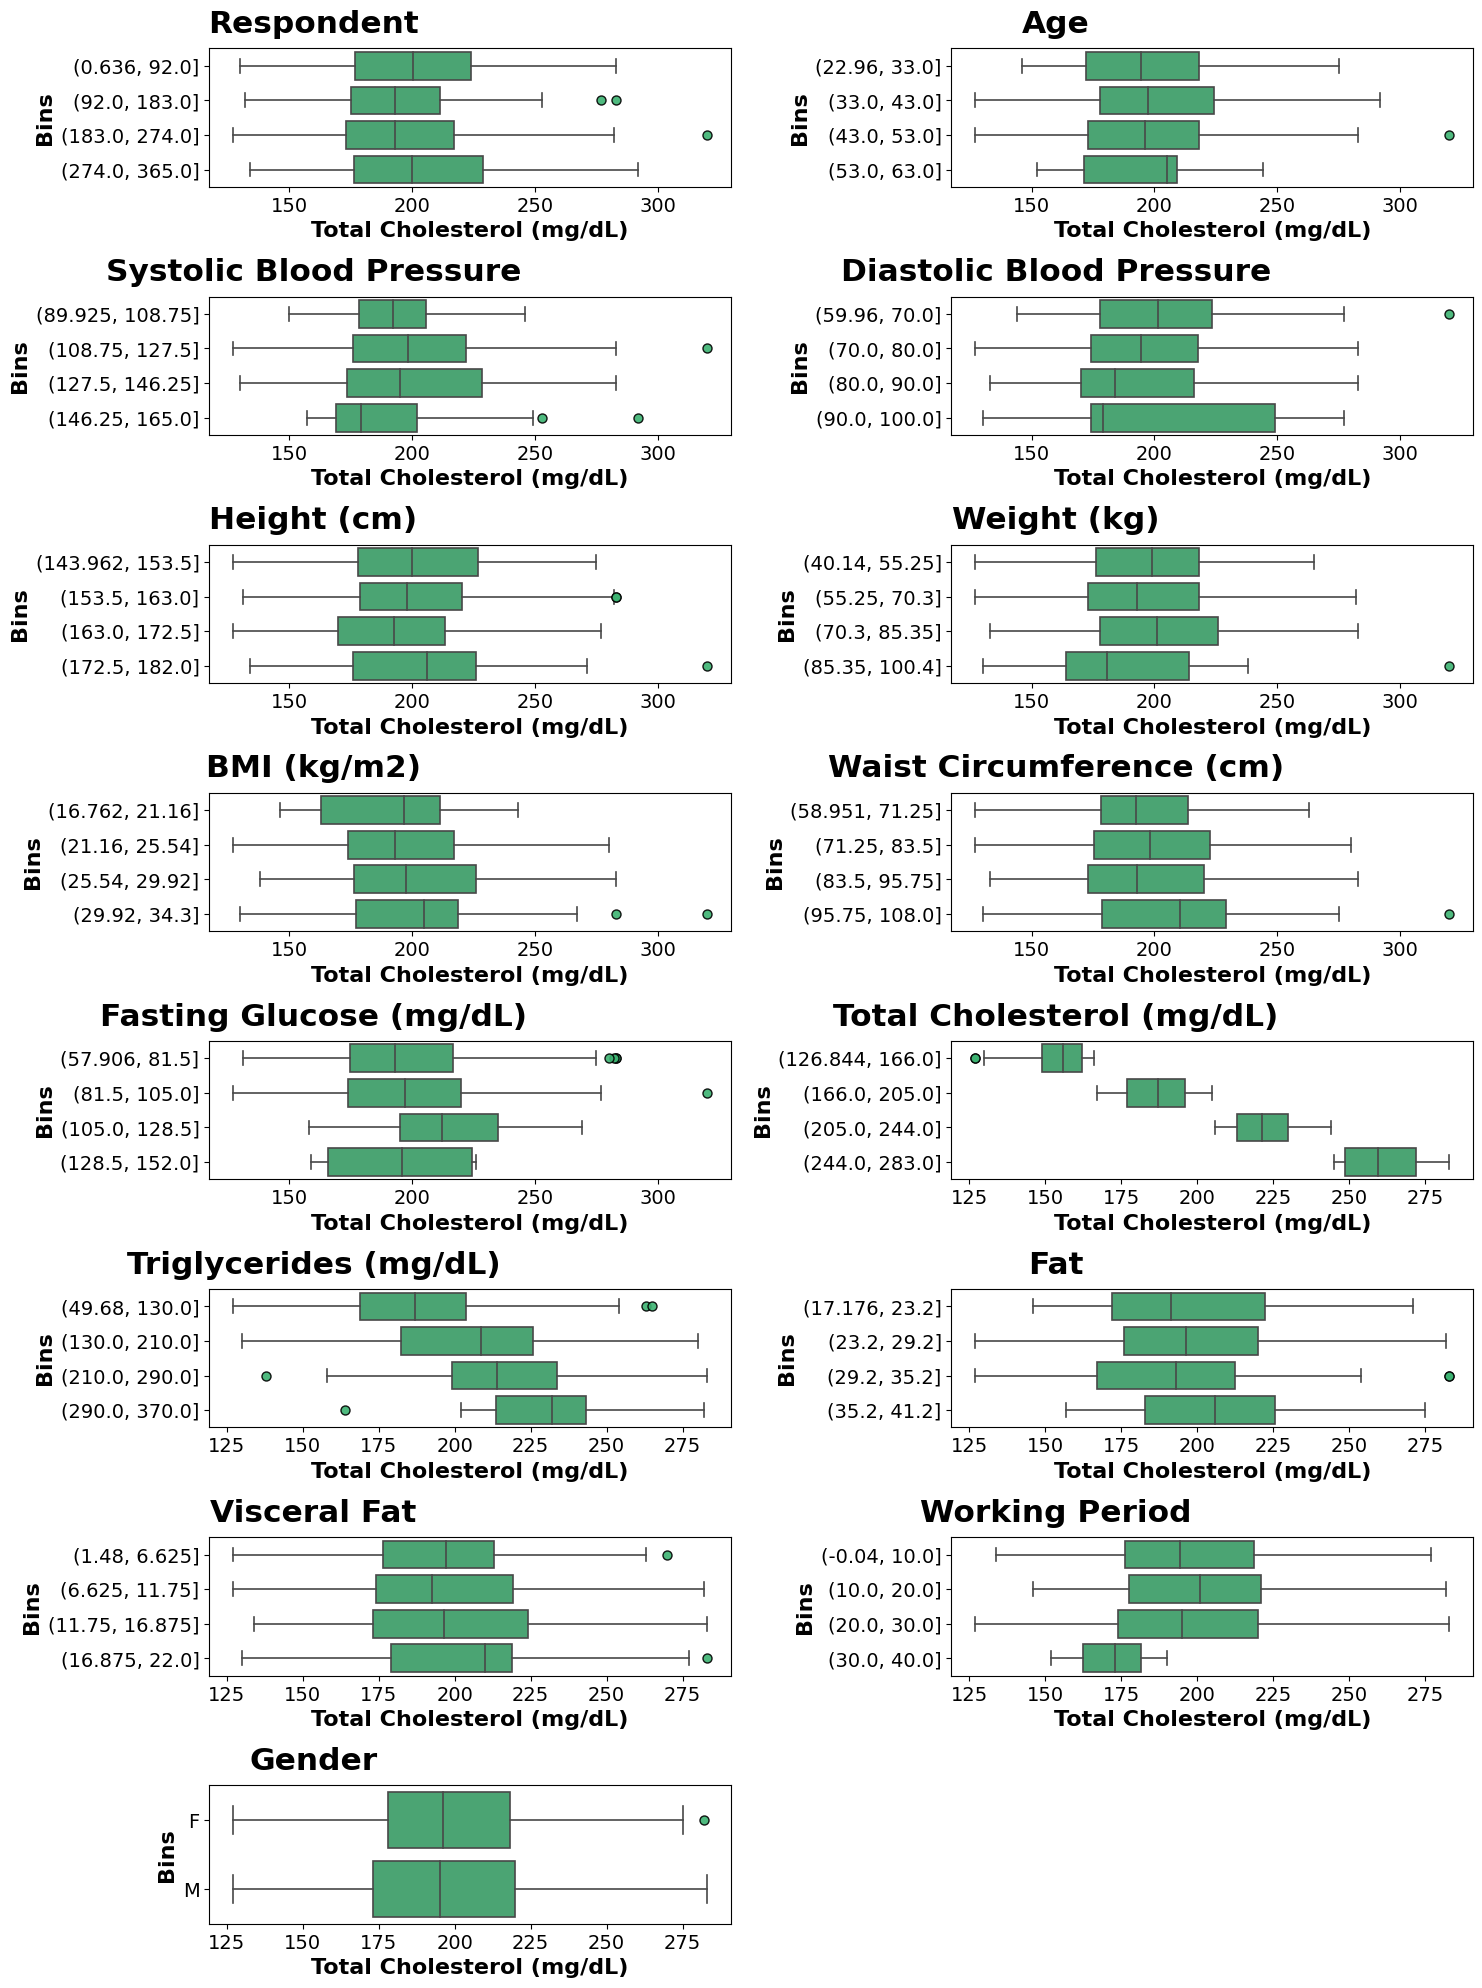

In [178]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
plot_boxplots(df,4, "Total Cholesterol (mg/dL)","zscore")